**Ankit Sekseria**<br>
**D19005**<br>
**Varishu Pant**<br>
**D19033**

## Question 2:
*Read the context carefully:*<br>
Thus far, in all cluster analysis examples we have used Euclidean distance as the dissimilarity measure. But sometimes other dissimilarity measures might be preferred. For example, correlation-based distance considers two observations to be similar if their features are highly correlated, even though the observed values may be far apart in terms of Euclidean distance. This is an unusual use of correlation, which is normally computed between variables; here it is computed between the observation profiles for each pair of observations. The following figure illustrates the difference between Euclidean and correlation-based distance.
Correlation-based distance focuses on the shapes of observation profiles rather than their magnitudes. The choice of dissimilarity measure is very important, as it has a strong effect on the resulting dendrogram. In general, careful attention should be paid to the type of data being clustered and the scientific question at hand. These considerations should determine what type of dissimilarity measure is used for hierarchical clustering.

For instance, consider an online retailer interested in clustering shoppers based on their past shopping histories. The goal is to identify subgroups of similar shoppers, so that shoppers within each subgroup can be show items and advertisements that are particularly likely to interest them. Suppose the data takes the form of a matrix where the rows are the shoppers and the columns are the items available for purchase; the elements of the data matrix indicate the number of times a given shopper has purchased a given item (i.e. a 0 if the shopper has never purchased this item, a 1 if the shopper has purchased it once, etc.) What type of dissimilarity measure should be used to cluster the shoppers? If Euclidean distance is used, then shoppers who have bought very few items overall (i.e. infrequent users of the online shopping site) will be clustered together. This may not be desirable. On the other hand, if correlation-based distance is used, then shoppers with similar preferences (e.g. shoppers who have bought items A and B but never items C or D) will be clustered together, even if some shoppers with these preferences are higher-volume shoppers than others. Therefore, for this application, correlation-based distance may be a better choice<br>
*Based on the idea presented elaborate and simplify the example provided about online retail*

In [1]:
# Importing Required Libraries
import pandas as pd 
import numpy as np
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy as hi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import scale

### Reading Created Data

In [402]:
data=pd.read_excel(r'D:\Praxis docs\stats\created_data.xlsx')

In [403]:
data.drop('Customers',inplace=True,axis=1)

In [17]:
data.head()

,Smartphone,Charger,Laptop,Back Cover,Headphones
0,80,63,1,3,8
1,141,135,320,280,20
2,650,35,18,120,450
3,560,180,40,183,430
4,150,169,370,490,89


### Dendrogram to visualise clusters

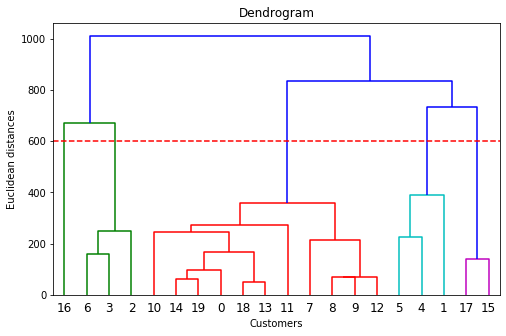

In [666]:
dist_mat=hi.linkage(data, method  = "complete",metric='euclidean',optimal_ordering=True) #dendogram and linkage
dendrogram = hi.dendrogram(dist_mat)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.axhline(y=600, color='r', linestyle='--')
plt.ylabel('Euclidean distances')
plt.show()

**Cutting dendrogram-**
We cut the dendrogram to get 5 clusters

### Fitting 2 models using different distance measures

**Making correlation matrix that gives correlation based distance between observations (customers)**

In [644]:
df=data.T.corr() #correlation matrix

In [645]:
df.shape

(20, 20)

In [646]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,-0.101742,0.512997,0.604868,-0.245587,-0.566904,0.557822,-0.443535,-0.159154,-0.190583,0.987796,0.052520,-0.233723,0.510471,0.905605,0.278761,-0.316837,0.117344,0.557935,0.978245
1,-0.101742,1.000000,-0.256402,-0.225040,0.934169,0.809042,-0.102393,0.800183,-0.011047,0.218006,-0.001350,0.561230,0.294652,-0.237987,-0.009439,0.418085,-0.015946,0.451403,-0.354300,-0.101239
2,0.512997,-0.256402,1.000000,0.969968,-0.241932,-0.339940,0.957363,-0.396564,0.524970,0.296049,0.487342,-0.397371,0.395796,0.996027,0.246376,-0.272652,0.413650,-0.421544,0.983785,0.601585
3,0.604868,-0.225040,0.969968,1.000000,-0.185785,-0.309417,0.971243,-0.338670,0.579977,0.397960,0.580517,-0.318301,0.455486,0.952821,0.419125,-0.157455,0.463364,-0.316446,0.982011,0.712662
4,-0.245587,0.934169,-0.241932,-0.185785,1.000000,0.920302,-0.115889,0.948708,0.273159,0.512564,-0.177821,0.348834,0.542721,-0.251686,-0.116459,0.201150,0.253827,0.249098,-0.334886,-0.180151


**Giving correlation matrix for fitting agglomerative model**

In [647]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')  
cluster.fit(df) #fitting on correlation matrix
data['Cluster']=cluster.labels_

**Looking at the distribution of clusters**

In [648]:
print('Customers in Cluster 0:')
pd.DataFrame(data.iloc[np.where(data.loc[:,'Cluster']==0)].iloc[:,0]).T 

Customers in Cluster 0:


,1,4,5,7
Smartphone,141,150,10,0


In [649]:
print('Customers in Cluster 1:')
pd.DataFrame(data.iloc[np.where(data.loc[:,'Cluster']==1)].iloc[:,0]).T

Customers in Cluster 1:


,0,10,14,19
Smartphone,80,254,102,121


In [650]:
print('Customers in Cluster 2:')
pd.DataFrame(data.iloc[np.where(data.loc[:,'Cluster']==2)].iloc[:,0]).T

Customers in Cluster 2:


,8,9,12,16
Smartphone,87,61,92,175


In [651]:
print('Customers in Cluster 3:')
pd.DataFrame(data.iloc[np.where(data.loc[:,'Cluster']==3)].iloc[:,0]).T

Customers in Cluster 3:


,11,15,17
Smartphone,33,190,69


In [652]:
print('Customers in Cluster 4:')
pd.DataFrame(data.iloc[np.where(data.loc[:,'Cluster']==4)].iloc[:,0]).T

Customers in Cluster 4:


,2,3,6,13,18
Smartphone,650,560,600,151,109


**Fitting an agglomerative model using original data.**

In [653]:
data.drop('Cluster',axis=1,inplace=True)

In [660]:
cluster1 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')  
cluster1.fit(data) #fitting on unscaled data
data['Cluster']=cluster1.labels_

In [661]:
print('Customers in Cluster 0:')
pd.DataFrame(data.iloc[np.where(data.loc[:,'Cluster']==0)].iloc[:,0]).T

Customers in Cluster 0:


,1,4,5
Smartphone,141,150,10


In [662]:
print('Customers in Cluster 1:')
pd.DataFrame(data.iloc[np.where(data.loc[:,'Cluster']==1)].iloc[:,0]).T

Customers in Cluster 1:


,2,3,6
Smartphone,650,560,600


In [663]:
print('Customers in Cluster 2:')
pd.DataFrame(data.iloc[np.where(data.loc[:,'Cluster']==2)].iloc[:,0]).T

Customers in Cluster 2:


,0,7,8,9,10,11,12,13,14,18,19
Smartphone,80,0,87,61,254,33,92,151,102,109,121


In [664]:
print('Customers in Cluster 3:')
pd.DataFrame(data.iloc[np.where(data.loc[:,'Cluster']==3)].iloc[:,0]).T

Customers in Cluster 3:


,15,17
Smartphone,190,69


In [665]:
print('Customers in Cluster 4:')
pd.DataFrame(data.iloc[np.where(data.loc[:,'Cluster']==4)].iloc[:,0]).T

Customers in Cluster 4:


,16
Smartphone,175


In [613]:
data.drop('Cluster',axis=1,inplace=True)

### Comparing the two distance measures

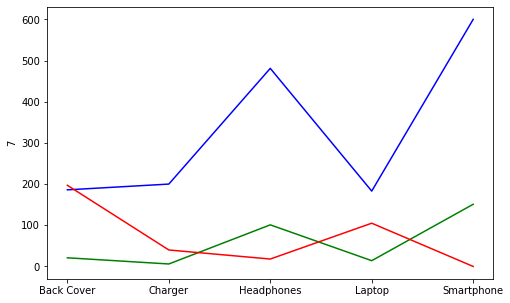

In [625]:
tran_d=data.T

s1=sns.lineplot(tran_d.index,tran_d.iloc[:,6],color='blue',legend='full')
s2=sns.lineplot(tran_d.index,tran_d.iloc[:,13],color='green',legend='full')
s3=sns.lineplot(tran_d.index,tran_d.iloc[:,7],color='red')
plt.show()

**Observation-**
Using Euclidean distance, customer 7(red) and customer 13(green) gets clustered together as they are both light buyers.  
Using Correlation based distance, customer 6(blue) and customer 13(green) gets clustered together because they same purchase patterns.

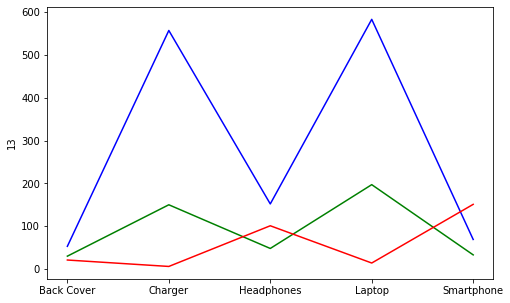

In [629]:
sns.lineplot(tran_d.index,tran_d.iloc[:,11],color='green')
sns.lineplot(tran_d.index,tran_d.iloc[:,17],color='blue')
sns.lineplot(tran_d.index,tran_d.iloc[:,13],color='red')
plt.show()

**Observation-**
Using Euclidean distance, customer 13(red) and customer 11(green) gets clustered together as they are both light buyers.  
Using Correlation based distance, customer 17(blue) and customer 11(green) gets clustered together because they same purchase patterns.

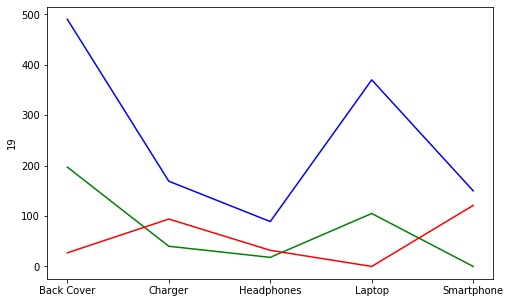

In [632]:
sns.lineplot(tran_d.index,tran_d.iloc[:,4],color='blue')
sns.lineplot(tran_d.index,tran_d.iloc[:,7],color='green')
sns.lineplot(tran_d.index,tran_d.iloc[:,19],color='red')
plt.show()

**Observation-**
Using Euclidean distance, customer 19(red) and customer 7(green) gets clustered together as they are both light buyers.  
Using Correlation based distance, customer 4(blue) and customer 7(green) gets clustered together because they same purchase patterns.

## Conclusion
- We observe that the customers with similar buying patterns gets clustered together like customer4 and customer7 for correlation based distance similarity,whereas,in case of euclidean distance customers gets clustered together with respect to the volume of their transactions.